# Preprocessing for Machine Learning

Skills and best practices for preparing data for modeling.

## What is data preprocessing?

Data preprocessing is a crucial step that comes after exploring and cleaning our dataset. Once we understand the dataset's contents, structure, and quality, we typically form an idea of how we want to model it. Preprocessing involves getting the data ready for modeling, often by transforming categorical features into numerical ones since most machine learning models in Python require numerical input. This step is essential and common in data analysis and modeling.

## Why preprocess?

The goal of preprocessing is not only to transform our dataset into a form that suitable for modeling, but also to improve the performance of our models, and in turn, produce more reliable results.

In [2]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

## Download the data

In [3]:
# Dictionary with dataset names as keys and URLs as values
dataset_urls = {
    'hiking': 'https://assets.datacamp.com/production/repositories/1816/datasets/4f26c48451bdbf73db8a58e226cd3d6b45cf7bb5/hiking.json',
    'wine': 'https://assets.datacamp.com/production/repositories/1816/datasets/9bd5350dfdb481e0f94eeef6acf2663452a8ef8b/wine_types.csv',
    'ufo':'https://assets.datacamp.com/production/repositories/1816/datasets/a5ebfe5d2ed194f2668867603b563963af4769e9/ufo_sightings_large.csv',
    'volunteer':'https://assets.datacamp.com/production/repositories/1816/datasets/668b96955d8b252aa8439c7602d516634e3f015e/volunteer_opportunities.csv'
}

def fetch_data_and_create_dataframe(dataset_urls):
    dataframes = {}  # Dictionary to store DataFrames

    for dataset, url in dataset_urls.items():
        try:
            # Determine file format based on the dataset name
            file_format = 'json' if dataset == 'hiking' else 'csv'
            
            # Read the data from the URL into a DataFrame
            if file_format == 'json':
                df = pd.read_json(url)
            else:
                df = pd.read_csv(url)

            dataframes[dataset] = df
            print(f"Successfully fetched {dataset} data.")
        except Exception as e:
            print(f"Error fetching {dataset} data: {str(e)}")

    return dataframes

# Call the function with your dataset URLs
fetched_dataframes = fetch_data_and_create_dataframe(dataset_urls)

# Now 'resulting_dataframes' is a dictionary where keys are dataset names and values are DataFrames
# You can access each DataFrame using, for example, fetched_dataframes['hiking']

Successfully fetched hiking data.
Successfully fetched wine data.
Successfully fetched ufo data.
Successfully fetched volunteer data.


One of the first steps after importing data is to inspect it, which we can do with the `head()` method.

In [4]:
# Display the hiking dataset
hiking = fetched_dataframes['hiking']
display(hiking.head())

,Prop_ID,Name,Location,Park_Name,Length,Difficulty,Other_Details,Accessible,Limited_Access,lat,lon
0,B057,Salt Marsh Nature Trail,"Enter behind the Salt Marsh Nature Center, loc...",Marine Park,0.8 miles,None,<p>The first half of this mile-long trail foll...,Y,N,NaN,NaN
1,B073,Lullwater,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,1.0 mile,Easy,Explore the Lullwater to see how nature thrive...,N,N,NaN,NaN
2,B073,Midwood,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.75 miles,Easy,Step back in time with a walk through Brooklyn...,N,N,NaN,NaN
3,B073,Peninsula,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.5 miles,Easy,Discover how the Peninsula has changed over th...,N,N,NaN,NaN
4,B073,Waterfall,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.5 miles,Easy,Trace the source of the Lake on the Waterfall ...,N,N,NaN,NaN


## Exploring with pandas

In [5]:
# Number of records with missing values
print(hiking.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Prop_ID         33 non-null     object 
 1   Name            33 non-null     object 
 2   Location        33 non-null     object 
 3   Park_Name       33 non-null     object 
 4   Length          29 non-null     object 
 5   Difficulty      27 non-null     object 
 6   Other_Details   31 non-null     object 
 7   Accessible      33 non-null     object 
 8   Limited_Access  33 non-null     object 
 9   lat             0 non-null      float64
 10  lon             0 non-null      float64
dtypes: float64(2), object(9)
memory usage: 3.0+ KB
None


In [6]:
# Summary statistics
print(fetched_dataframes['wine'].describe())

             Type     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000   

## Removing missing data

In [7]:
data = {
    'A': [1.0, 4.0, 7.0, np.nan, 5.0],
    'B': [np.nan, 7.0, np.nan, 7.0, 9.0],
    'C': [2.0, 3.0, np.nan, np.nan, 7.0],
}

df = pd.DataFrame(data)
display(df)

,A,B,C
0,1.0,NaN,2.0
1,4.0,7.0,3.0
2,7.0,NaN,NaN
3,NaN,7.0,NaN
4,5.0,9.0,7.0


In [8]:
# drop all rows containing missing values
display(df.dropna())

,A,B,C
1,4.0,7.0,3.0
4,5.0,9.0,7.0


In [9]:
# drop specific rows using index labels (defaults to dropping rows)
display(df.drop([1, 2, 3]))

,A,B,C
0,1.0,NaN,2.0
4,5.0,9.0,7.0


In [12]:
# drop a specific column especially if most or all of its columns are missing
# axis=1 means we want to drop a column rather than a row
display(df.drop("A", axis=1))

,B,C
0,NaN,2.0
1,7.0,3.0
2,NaN,NaN
3,7.0,NaN
4,9.0,7.0


In [15]:
# first - how many values we have in each column
display(df.isna().sum())

A    1
B    2
C    2
dtype: int64

In [18]:
# second - specify a list of labels to dropna
# here, drop those rows where there's missing values in column B
display(df.dropna(subset=["B"]))

,A,B,C
1,4.0,7.0,3.0
3,NaN,7.0,NaN
4,5.0,9.0,7.0


In [19]:
# specify how many missing values we require in each row
display(df.dropna(thresh=2))

,A,B,C
0,1.0,NaN,2.0
1,4.0,7.0,3.0
4,5.0,9.0,7.0


## Merging datasets

In [20]:
import pandas as pd # type: ignore

# Gas prices dataset
gas_prices_data = {'date': ['2023-01-01', '2023-01-05', '2023-02-15', '2023-03-17', '2023-04-23', '2023-04-24'],
                   'price': [2.00, 3.00, 2.00, 1.00, 3.00, 2.50]}
gas_prices_df = pd.DataFrame(gas_prices_data)

# Shipment history dataset
shipment_history_data = {'date': ['2023-01-01', '2023-01-02', '2023-02-15', '2023-03-01', '2023-04-23', '2023-05-11'],
                          'quantity': [1000, 5000, 500, 200, 1500, 2500]}
shipment_history_df = pd.DataFrame(shipment_history_data)

# Car sales dataset
car_sales_data = {'date': ['2023-03-02', '2023-03-27', '2023-04-28', '2023-05-15', '2023-07-06', '2023-07-23', '2023-08-09', '2023-08-17'],
                  'sales': [5020, 10020, 30102, 200, 1500, 2500, 500, 2150]}
car_sales_df = pd.DataFrame(car_sales_data)

# Merging all three datasets on 'date' with a full outer join
merged_data = pd.merge(gas_prices_df, shipment_history_df, on='date', how='outer')
merged_data = pd.merge(merged_data, car_sales_df, on='date', how='outer')

# Sorting the DataFrame by 'date' to ensure correct filling order
merged_data['date'] = pd.to_datetime(merged_data['date'])
merged_data.sort_values(by='date', inplace=True)

# Filling missing values based on the specified method
merged_data.ffill(inplace=True)
merged_data.bfill(inplace=True)

# If you want to see the result
print(merged_data)


         date  price  quantity    sales
0  2023-01-01    2.0    1000.0   5020.0
6  2023-01-02    2.0    5000.0   5020.0
1  2023-01-05    3.0    5000.0   5020.0
2  2023-02-15    2.0     500.0   5020.0
7  2023-03-01    2.0     200.0   5020.0
9  2023-03-02    2.0     200.0   5020.0
3  2023-03-17    1.0     200.0   5020.0
10 2023-03-27    1.0     200.0  10020.0
4  2023-04-23    3.0    1500.0  10020.0
5  2023-04-24    2.5    1500.0  10020.0
11 2023-04-28    2.5    1500.0  30102.0
8  2023-05-11    2.5    2500.0  30102.0
12 2023-05-15    2.5    2500.0    200.0
13 2023-07-06    2.5    2500.0   1500.0
14 2023-07-23    2.5    2500.0   2500.0
15 2023-08-09    2.5    2500.0    500.0
16 2023-08-17    2.5    2500.0   2150.0


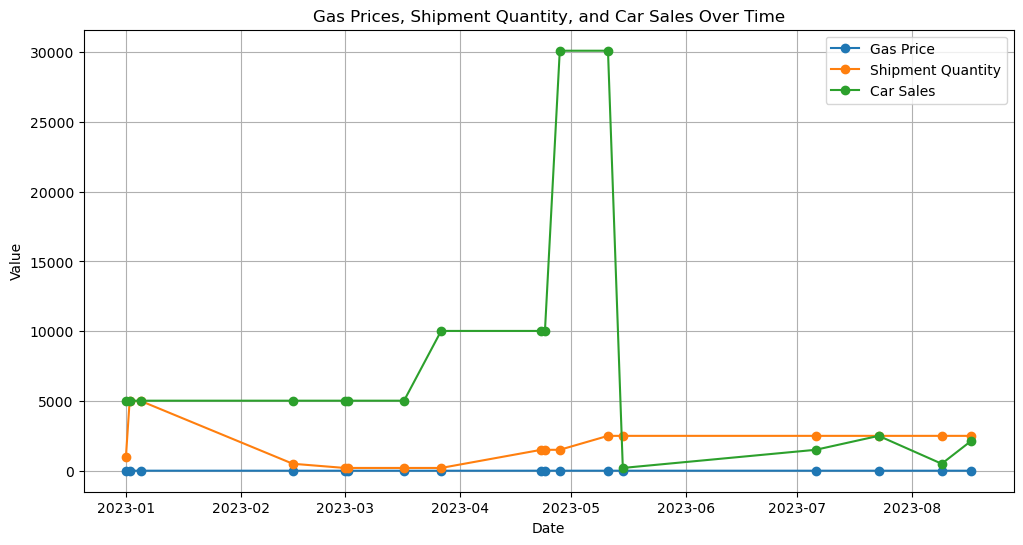

In [21]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore

# Assuming you have already merged and filled the data as mentioned in the previous code

# Plotting the line graph
plt.figure(figsize=(12, 6))

plt.plot(merged_data['date'], merged_data['price'], label='Gas Price', marker='o')
plt.plot(merged_data['date'], merged_data['quantity'], label='Shipment Quantity', marker='o')
plt.plot(merged_data['date'], merged_data['sales'], label='Car Sales', marker='o')

plt.title('Gas Prices, Shipment Quantity, and Car Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


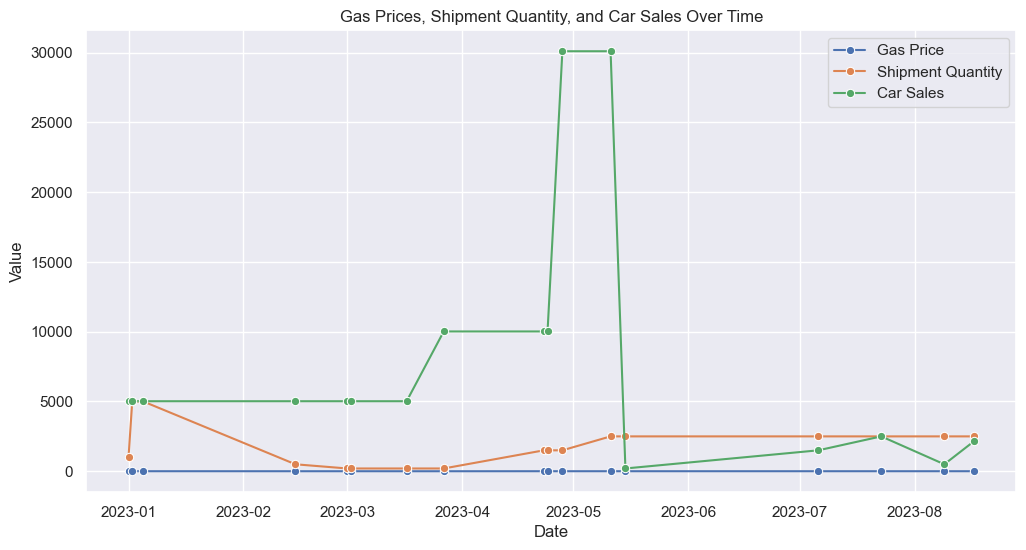

In [22]:
import pandas as pd # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore

# Assuming you have already merged and filled the data as mentioned in the previous code

# Set Seaborn style
sns.set(style="darkgrid")

# Plotting the line graph with Seaborn
plt.figure(figsize=(12, 6))

sns.lineplot(x='date', y='price', data=merged_data, label='Gas Price', marker='o')
sns.lineplot(x='date', y='quantity', data=merged_data, label='Shipment Quantity', marker='o')
sns.lineplot(x='date', y='sales', data=merged_data, label='Car Sales', marker='o')

plt.title('Gas Prices, Shipment Quantity, and Car Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


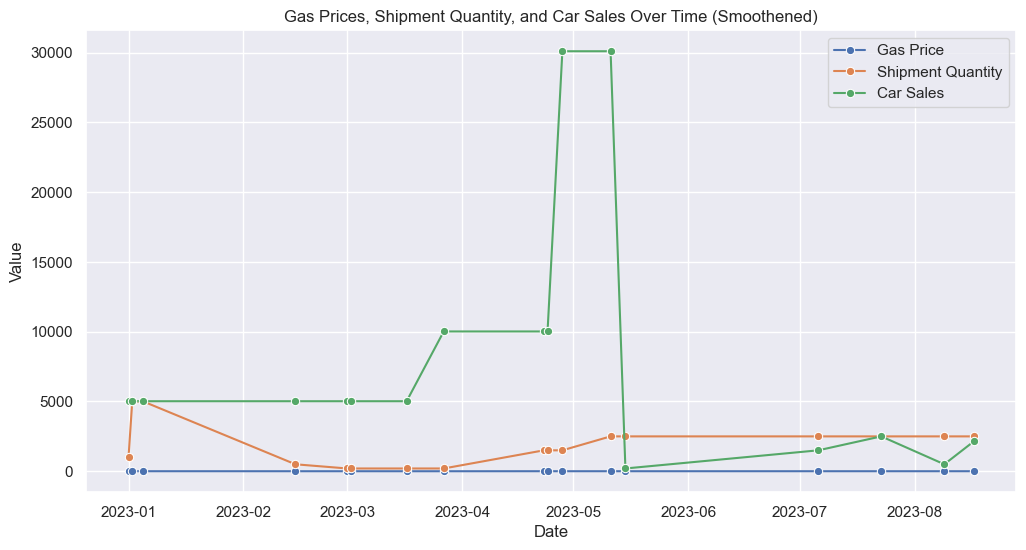

In [23]:
# Assuming you have already merged and filled the data as mentioned in the previous code

# Set Seaborn style
sns.set(style="darkgrid")

# Plotting the smoothened line graph with Seaborn
plt.figure(figsize=(12, 6))

sns.lineplot(x='date', y='price', data=merged_data, label='Gas Price', marker='o', err_style=None, estimator='lowess')
sns.lineplot(x='date', y='quantity', data=merged_data, label='Shipment Quantity', marker='o', err_style=None, estimator='lowess')
sns.lineplot(x='date', y='sales', data=merged_data, label='Car Sales', marker='o', err_style=None, estimator='lowess')

plt.title('Gas Prices, Shipment Quantity, and Car Sales Over Time (Smoothened)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [24]:
# Display the wine dataset
wine = fetched_dataframes['wine']
display(wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Type                          178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

None

In [25]:
display(wine.describe())

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [26]:
volunteer = fetched_dataframes["volunteer"]
display(volunteer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   opportunity_id      665 non-null    int64  
 1   content_id          665 non-null    int64  
 2   vol_requests        665 non-null    int64  
 3   event_time          665 non-null    int64  
 4   title               665 non-null    object 
 5   hits                665 non-null    int64  
 6   summary             665 non-null    object 
 7   is_priority         62 non-null     object 
 8   category_id         617 non-null    float64
 9   category_desc       617 non-null    object 
 10  amsl                0 non-null      float64
 11  amsl_unit           0 non-null      float64
 12  org_title           665 non-null    object 
 13  org_content_id      665 non-null    int64  
 14  addresses_count     665 non-null    int64  
 15  locality            595 non-null    object 
 16  region  

None

In [27]:
# drop the Latitude and Longitude columns 
volunteer_cols = volunteer.drop(["Latitude","Longitude"], axis=1)
volunteer_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   opportunity_id      665 non-null    int64  
 1   content_id          665 non-null    int64  
 2   vol_requests        665 non-null    int64  
 3   event_time          665 non-null    int64  
 4   title               665 non-null    object 
 5   hits                665 non-null    int64  
 6   summary             665 non-null    object 
 7   is_priority         62 non-null     object 
 8   category_id         617 non-null    float64
 9   category_desc       617 non-null    object 
 10  amsl                0 non-null      float64
 11  amsl_unit           0 non-null      float64
 12  org_title           665 non-null    object 
 13  org_content_id      665 non-null    int64  
 14  addresses_count     665 non-null    int64  
 15  locality            595 non-null    object 
 16  region  

In [29]:
# Subset volunteer_cols by dropping rows containing missing values in the category_desc.
volunteer_subset = volunteer_cols.dropna(subset=["category_desc"])


In [30]:
#  Verify
volunteer_subset.shape

(617, 33)

## Working with data types

In [31]:
print(volunteer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   opportunity_id      665 non-null    int64  
 1   content_id          665 non-null    int64  
 2   vol_requests        665 non-null    int64  
 3   event_time          665 non-null    int64  
 4   title               665 non-null    object 
 5   hits                665 non-null    int64  
 6   summary             665 non-null    object 
 7   is_priority         62 non-null     object 
 8   category_id         617 non-null    float64
 9   category_desc       617 non-null    object 
 10  amsl                0 non-null      float64
 11  amsl_unit           0 non-null      float64
 12  org_title           665 non-null    object 
 13  org_content_id      665 non-null    int64  
 14  addresses_count     665 non-null    int64  
 15  locality            595 non-null    object 
 16  region  

`datetime64` data type unlocks time series functionality.
datetime64 is another common data type that stores date and time data. This special data type unlocks a bunch of extra functionality for working with time series data, such as datetime indexing, adding timezone information, and selecting a datetime sampling frequency.